In [0]:
!pip install sklearn


In [0]:
!pip install sklearn.cross_validation

  Could not find a version that satisfies the requirement sklearn.cross_validation (from versions: )
No matching distribution found for sklearn.cross_validation


In [0]:
from google.colab import drive
drive.mount('/content/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/gdrive


In [0]:
import numpy as np
from time import time
from sklearn import metrics
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.utils.multiclass import unique_labels

from sklearn import datasets, neighbors, linear_model, tree
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.metrics import classification_report, confusion_matrix
n=8
#1-KNN
from sklearn.neighbors import KNeighborsClassifier
#2-RandomForest
from sklearn.ensemble import RandomForestClassifier
#3-SVM
from sklearn import datasets, svm
#4-DecisionTree
from sklearn import tree
#5-LDA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
#6-GaussianNB
from sklearn.naive_bayes import GaussianNB
#7-MLP
from sklearn.neural_network import MLPClassifier


In [0]:
f = open('/content/gdrive/My Drive/Features/Normalizedfeatures.csv')
attributes=f.readline()
X = []
y = []
for line in f:
    line = line.rstrip().split(',')
    l = [float(i) for i in line]
    X.append(l[:-1])
    y.append(l[-1])
    
X = np.asarray(X)
y = np.asarray(y)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [0]:
print (X_train.shape, X_test.shape)

(1926, 174) (642, 174)


In [0]:
#1-KNN
print('#1-KNN')
import time
start = time.time()

model = neighbors.KNeighborsClassifier(n_neighbors = 20)
# model.fit(X_train, y_train)
model.fit(X_train, y_train)
y_test_pred = model.predict(X_test)
# y_pred = model.predict(X)
print (metrics.accuracy_score(y_test, y_test_pred, normalize=True, sample_weight=None))

end = time.time()
print("Time taken ", end - start)
# print (confusion_matrix(y, y_pred))

# #plotting confusion matrix
# df_confusion = pd.crosstab(y_test, y_test_pred, rownames=['Actual'], colnames=['Predicted'])

# def plot_confusion_matrix(df_confusion, title='Confusion matrix', cmap=plt.cm.gray_r):
#     plt.matshow(df_confusion, cmap=cmap) # imshow
#     #plt.title(title)
#     plt.colorbar()
#     tick_marks = np.arange(len(df_confusion.columns))
#     plt.xticks(tick_marks, df_confusion.columns, rotation=45)
#     plt.yticks(tick_marks, df_confusion.index)
#     #plt.tight_layout()
#     plt.ylabel(df_confusion.index.name)
#     plt.xlabel(df_confusion.columns.name)

# plot_confusion_matrix(df_confusion)

# np.set_printoptions(precision=2)
# class_names = np.array([0, 1, 2])
# class_names.astype(int)

# y_test.astype(int)
# y_test_pred.astype(int)

# # Plot non-normalized confusion matrix
# plot_confusion_matrix(y_test, y_test_pred, classes=class_names,
#                       title='Confusion matrix, without normalization')

# # Plot normalized confusion matrix
# # plot_confusion_matrix(y_test, y_pred, classes=class_names, normalize=True,
# #                       title='Normalized confusion matrix')

# plt.show()

#1-KNN
0.8613707165109035
Time taken  0.456071138381958


[2.9108939e-03 2.0211674e-03 4.5108784e-02 2.4376814e-03 5.7662841e-02
 3.7447480e-03 3.6597274e-02 2.9793947e-03 5.1231352e-03 4.3414445e-03
 3.9787393e-04 3.8411987e-03 8.1883855e-03 0.0000000e+00 1.8367056e-03
 3.7840493e-03 1.3049865e-02 5.3327065e-03 3.9547347e-03 5.1357318e-04
 4.7084959e-03 1.0402532e-02 2.6182372e-03 3.7628813e-03 4.4043595e-03
 0.0000000e+00 1.9984460e-03 0.0000000e+00 4.7173300e-03 7.1060732e-03
 4.5226486e-03 1.8274178e-03 3.7054040e-02 0.0000000e+00 2.0078970e-02
 4.2392216e-03 2.5408051e-03 5.0852508e-03 4.1892538e-03 3.2435372e-03
 8.8980678e-04 2.2035462e-03 0.0000000e+00 0.0000000e+00 2.2128904e-03
 1.6775086e-03 2.5765072e-03 0.0000000e+00 3.5493154e-04 0.0000000e+00
 0.0000000e+00 0.0000000e+00 2.6700972e-03 4.6697170e-02 0.0000000e+00
 0.0000000e+00 3.8368537e-04 9.8820298e-04 3.9698668e-03 0.0000000e+00
 1.9344067e-03 3.2830290e-03 3.6174278e-03 0.0000000e+00 0.0000000e+00
 0.0000000e+00 0.0000000e+00 0.0000000e+00 3.5634727e-04 1.6061941e-03
 1.103

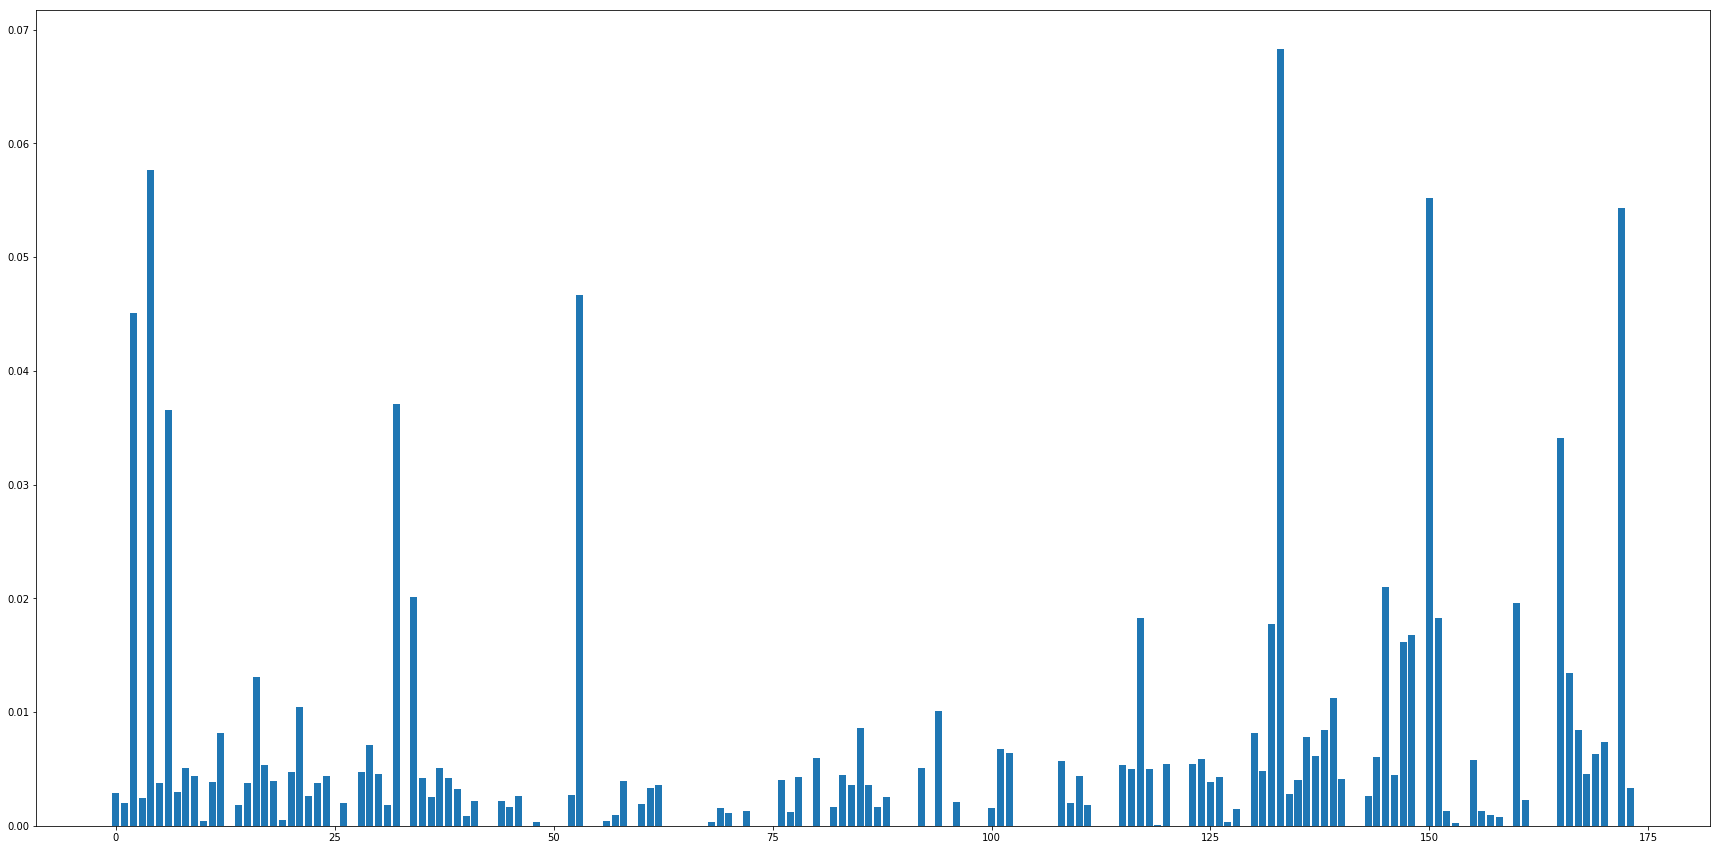

In [0]:
# plot feature importance manually

from numpy import loadtxt
from xgboost import XGBClassifier
# from matplotlib import pyplot

import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [30, 15]


# fit model no training data
model = XGBClassifier()
model.fit(X, y)
# feature importance
print(model.feature_importances_)
# plot
plt.bar(range(len(model.feature_importances_)), model.feature_importances_)
plt.show()

In [0]:
feat = model.feature_importances_
feat1 = sorted(feat, reverse = True)
print (feat1)


[0.06827858, 0.05766284, 0.055237096, 0.054316163, 0.04669717, 0.045108784, 0.03705404, 0.036597274, 0.034105793, 0.02097968, 0.02007897, 0.019580247, 0.018307013, 0.018241564, 0.01773947, 0.01676914, 0.01613268, 0.013400138, 0.013049865, 0.011212535, 0.010402532, 0.010107396, 0.0085566, 0.008408645, 0.008385213, 0.0081883855, 0.0081857275, 0.007848303, 0.0073778536, 0.007106073, 0.0067394017, 0.006359534, 0.0063348264, 0.006144897, 0.0060240175, 0.005998978, 0.005853168, 0.0058176056, 0.005716665, 0.00546308, 0.0054195975, 0.005346495, 0.0053327065, 0.005123135, 0.005109583, 0.005085251, 0.0050031804, 0.004969684, 0.0048473664, 0.00471733, 0.004708496, 0.0045650546, 0.0045226486, 0.004445394, 0.0044342983, 0.0044043595, 0.0043414445, 0.004339941, 0.0042871395, 0.004275352, 0.0042392216, 0.004189254, 0.0040866816, 0.004014375, 0.003984416, 0.003969867, 0.0039547347, 0.0038411987, 0.0038282573, 0.0037840493, 0.0037628813, 0.003744748, 0.0036174278, 0.0036071918, 0.0035517858, 0.00336270

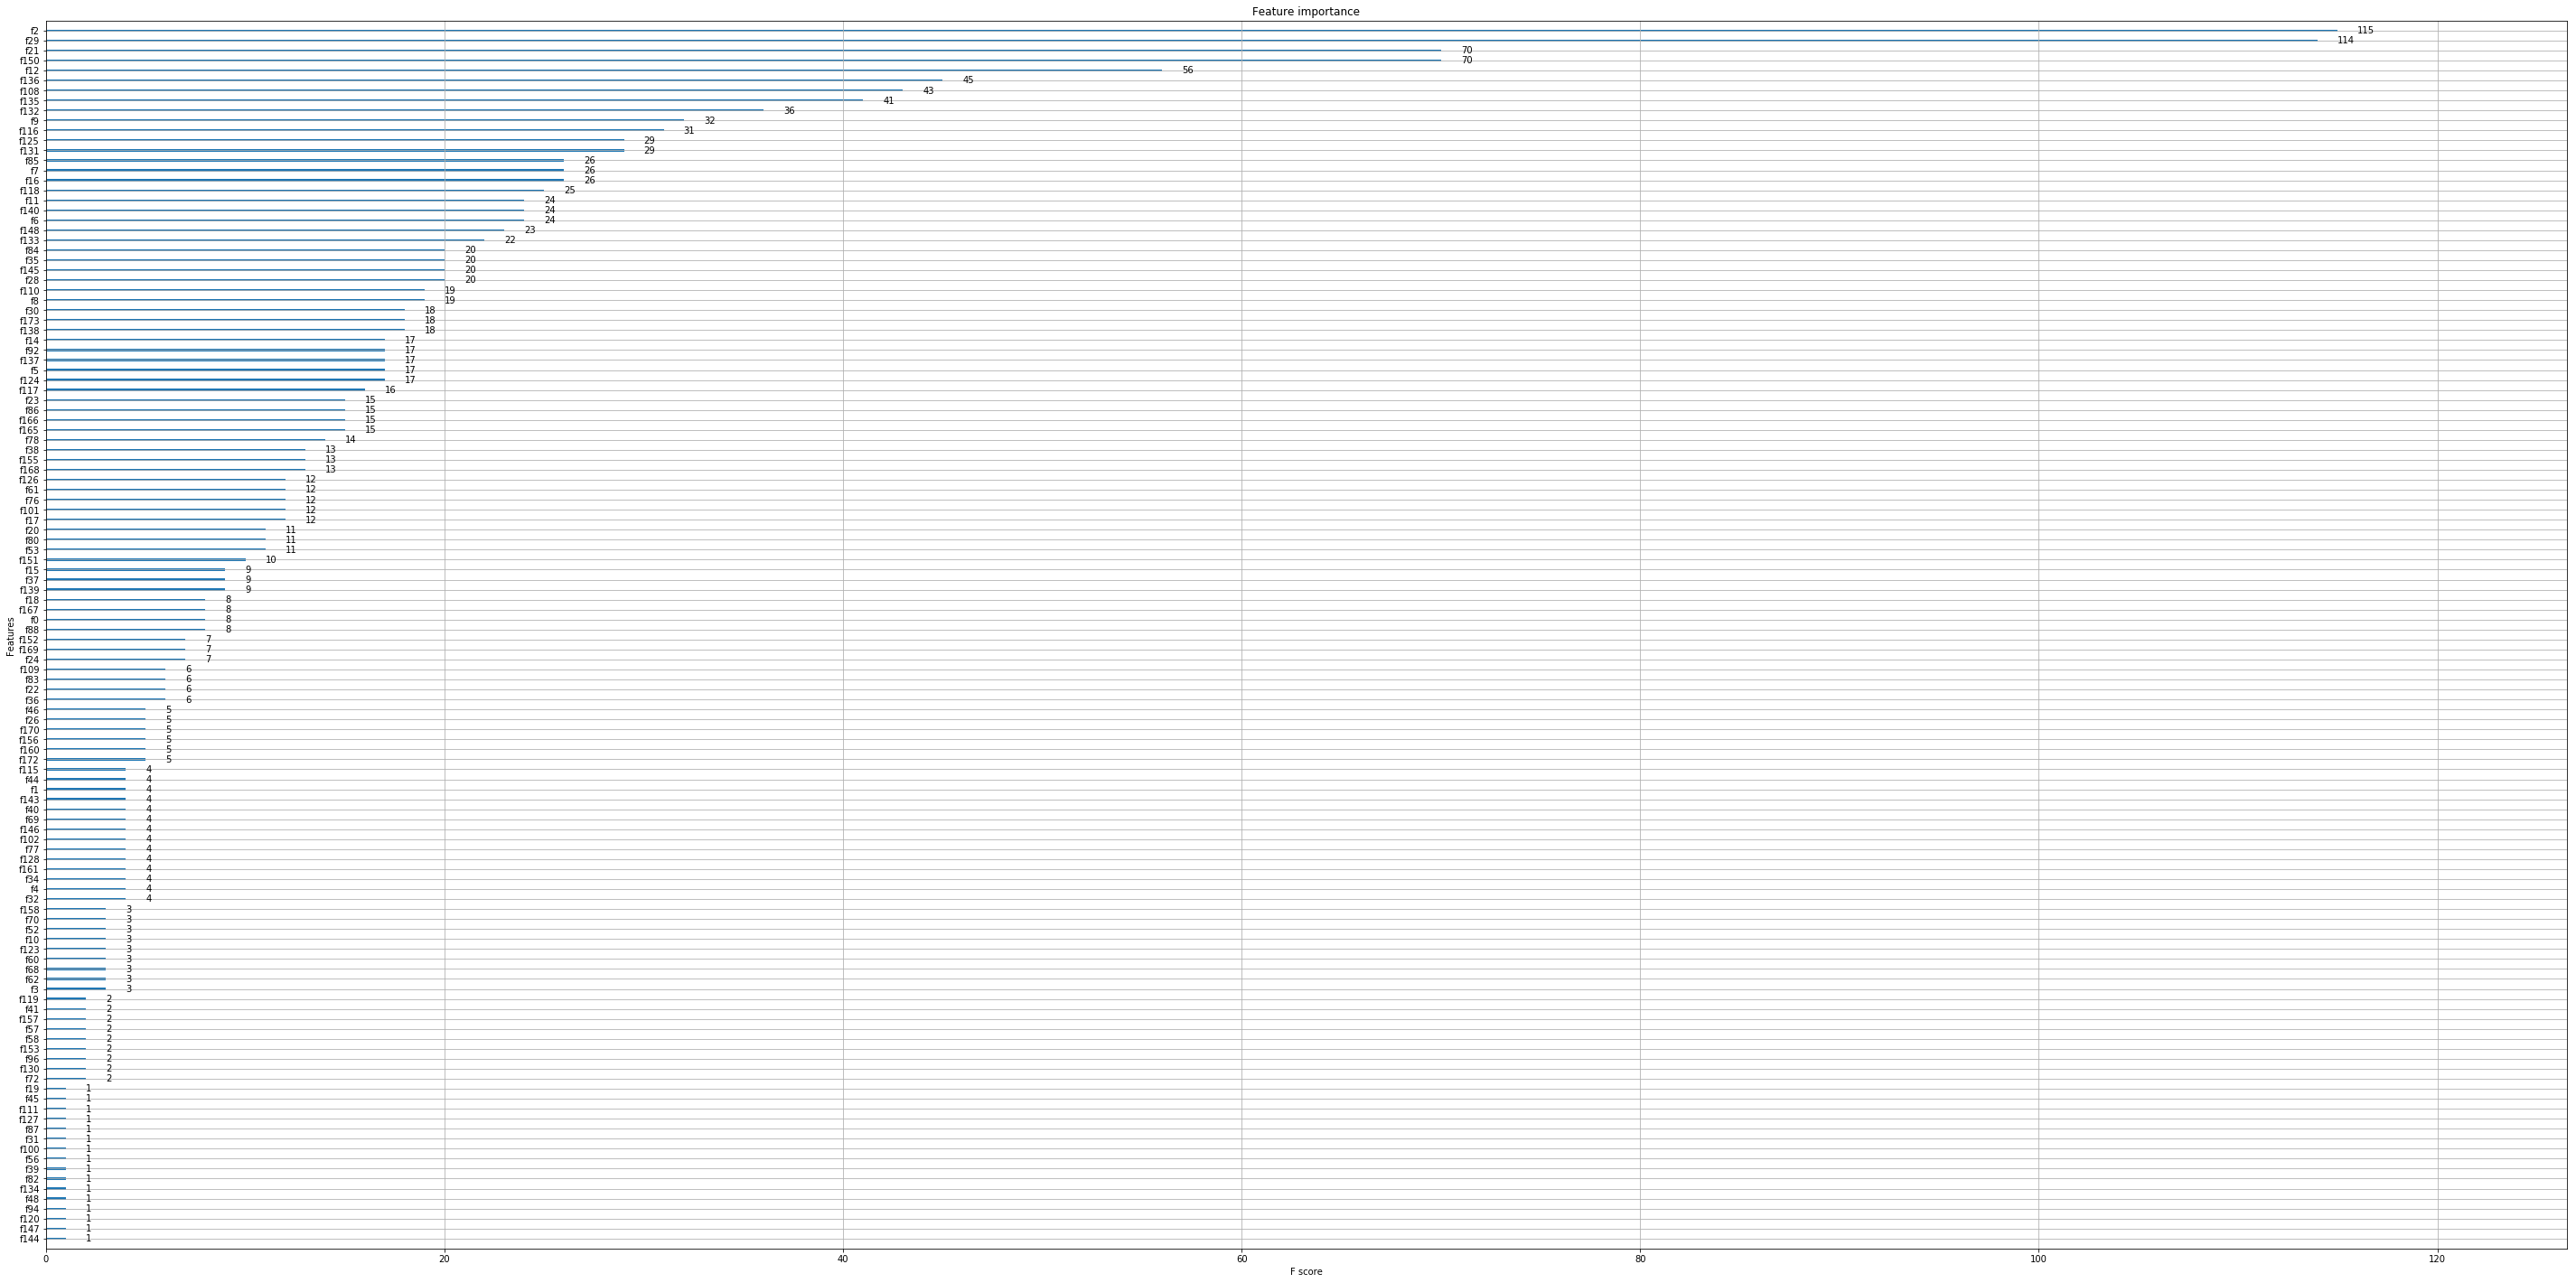

In [0]:
# plot feature importance using built-in function

from numpy import loadtxt
from xgboost import XGBClassifier
from xgboost import plot_importance
# from matplotlib import pyplot

import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [50, 25]

# fit model no training data
model = XGBClassifier()
model.fit(X, y)
# plot feature importance
plot_importance(model)
plt.show()
# feat_num = [2, 29, 21, 150, 12, 136, 108, 135, 132, 9, 116, 125, 131, 85, 7, 16, 118, 11, 140, 6]


In [0]:
columns = ['Coeffiecient of Variation','Mean of Vertex to Vertex Slope','Variance of Vertex to Vertex Slope',
         'Hjorth_Activity','Hjorth_Mobility','Hjorth_Complexity',
         'Kurtosis','2nd Difference Mean','2nd Difference Max',
         'Skewness','1st Difference Mean','1st Difference Max',
         'FFT Delta MaxPower','FFT Theta MaxPower','FFT Alpha MaxPower','FFT Beta MaxPower','Delta/Theta','Delta/Alpha','Theta/Alpha','(Delta+Theta)/Alpha',
         '1Wavelet Approximate Mean','1Wavelet Approximate Std Deviation','1Wavelet Approximate Energy','1Wavelet Detailed Mean','1Wavelet Detailed Std Deviation','1Wavelet Detailed Energy','1Wavelet Approximate Entropy','1Wavelet Detailed Entropy',
         '2Wavelet Approximate Mean','Wavelet Approximate Std Deviation','Wavelet Approximate Energy','Wavelet Detailed Mean','Wavelet Detailed Std Deviation','Wavelet Detailed Energy','Wavelet Approximate Entropy','Wavelet Detailed Entropy',
         '3Wavelet Approximate Mean','Wavelet Approximate Std Deviation','Wavelet Approximate Energy','Wavelet Detailed Mean','Wavelet Detailed Std Deviation','Wavelet Detailed Energy','Wavelet Approximate Entropy','Wavelet Detailed Entropy',
         '4Wavelet Approximate Mean','Wavelet Approximate Std Deviation','Wavelet Approximate Energy','Wavelet Detailed Mean','Wavelet Detailed Std Deviation','Wavelet Detailed Energy','Wavelet Approximate Entropy','Wavelet Detailed Entropy',
         '5Wavelet Approximate Mean','Wavelet Approximate Std Deviation','Wavelet Approximate Energy','Wavelet Detailed Mean','Wavelet Detailed Std Deviation','Wavelet Detailed Energy','Wavelet Approximate Entropy','Wavelet Detailed Entropy',
         '6Wavelet Approximate Mean','Wavelet Approximate Std Deviation','Wavelet Approximate Energy','Wavelet Detailed Mean','Wavelet Detailed Std Deviation','Wavelet Detailed Energy','Wavelet Approximate Entropy','Wavelet Detailed Entropy',
         '7Wavelet Approximate Mean','Wavelet Approximate Std Deviation','Wavelet Approximate Energy','Wavelet Detailed Mean','Wavelet Detailed Std Deviation','Wavelet Detailed Energy','Wavelet Approximate Entropy','Wavelet Detailed Entropy',
         '8Wavelet Approximate Mean','Wavelet Approximate Std Deviation','Wavelet Approximate Energy','Wavelet Detailed Mean','Wavelet Detailed Std Deviation','Wavelet Detailed Energy','Wavelet Approximate Entropy','Wavelet Detailed Entropy',
         '9Wavelet Approximate Mean','Wavelet Approximate Std Deviation','Wavelet Approximate Energy','Wavelet Detailed Mean','Wavelet Detailed Std Deviation','Wavelet Detailed Energy','Wavelet Approximate Entropy','Wavelet Detailed Entropy',
         '10Wavelet Approximate Mean','Wavelet Approximate Std Deviation','Wavelet Approximate Energy','Wavelet Detailed Mean','Wavelet Detailed Std Deviation','Wavelet Detailed Energy','Wavelet Approximate Entropy','Wavelet Detailed Entropy',
         '11Wavelet Approximate Mean','Wavelet Approximate Std Deviation','Wavelet Approximate Energy','Wavelet Detailed Mean','Wavelet Detailed Std Deviation','Wavelet Detailed Energy','Wavelet Approximate Entropy','Wavelet Detailed Entropy',
         '12Wavelet Approximate Mean','Wavelet Approximate Std Deviation','Wavelet Approximate Energy','Wavelet Detailed Mean','Wavelet Detailed Std Deviation','Wavelet Detailed Energy','Wavelet Approximate Entropy','Wavelet Detailed Entropy',
         '13Wavelet Approximate Mean','Wavelet Approximate Std Deviation','Wavelet Approximate Energy','Wavelet Detailed Mean','Wavelet Detailed Std Deviation','Wavelet Detailed Energy','Wavelet Approximate Entropy','Wavelet Detailed Entropy',
         '14Wavelet Approximate Mean','Wavelet Approximate Std Deviation','Wavelet Approximate Energy','Wavelet Detailed Mean','Wavelet Detailed Std Deviation','Wavelet Detailed Energy','Wavelet Approximate Entropy','Wavelet Detailed Entropy',
         'AR1','AR2','AR3','AR4','AR5','AR6','AR7','AR8','AR9','AR10','AR11','AR12','AR13','AR14','AR15','AR16','AR17','AR18',
         'AR19','AR20','AR21','AR22','AR23','AR24','AR25','AR26','AR27','AR28','AR29','AR30','AR31','AR32','AR33','AR34','AR35','AR36','AR37','AR38','AR39','AR40','AR41','AR42']

In [0]:
feat_num = [2, 29, 21, 150, 12, 136, 108, 135, 132, 9, 116, 125, 131, 85, 7, 16, 118, 11, 140, 6]
for  i in feat_num:
    print(columns[i])
# print (columns[2])

Variance of Vertex to Vertex Slope
Wavelet Approximate Std Deviation
1Wavelet Approximate Std Deviation
AR19
FFT Delta MaxPower
AR5
12Wavelet Approximate Mean
AR4
AR1
Skewness
13Wavelet Approximate Mean
Wavelet Approximate Std Deviation
Wavelet Detailed Entropy
Wavelet Approximate Std Deviation
2nd Difference Mean
Delta/Theta
Wavelet Approximate Energy
1st Difference Max
AR9
Kurtosis


In [0]:
# use feature importance for feature selection
from numpy import loadtxt
from numpy import sort
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.feature_selection import SelectFromModel


model = XGBClassifier(max_depth = 3,n_estimators=5)
model.fit(X_train, y_train)

# make predictions for test data and evaluate
y_pred = model.predict(X_test)
predictions = [round(value) for value in y_pred]
accuracy = accuracy_score(y_test, predictions)
print("Accuracy: %.5f%%" % (accuracy * 100.0))

# Fit model using each importance as a threshold
# print(model.feature_importances_)

feat_importances = pd.Series(model.feature_importances_, index=columns)
# feat_importances.nlargest(50).plot(kind='barh')
# plt.show()

thresholds = sorted(model.feature_importances_, reverse = True)


for thresh in thresholds[:20]:
    # select features using threshold
    selection = SelectFromModel(model, threshold=thresh, prefit=True)
    select_X_train = selection.transform(X_train)
    # train model
    selection_model = XGBClassifier()
    selection_model.fit(select_X_train, y_train)
    # eval model
    select_X_test = selection.transform(X_test)
    y_pred = selection_model.predict(select_X_test)
    predictions = [round(value) for value in y_pred]
    accuracy = accuracy_score(y_test, predictions)
    print("Thresh=%.3f, n=%d, Accuracy: %.2f%%" % (thresh, select_X_train.shape[1], accuracy*100.0))

Accuracy: 88.00623%
Thresh=0.150, n=1, Accuracy: 63.71%
Thresh=0.147, n=2, Accuracy: 80.84%
Thresh=0.135, n=3, Accuracy: 83.33%
Thresh=0.068, n=4, Accuracy: 83.80%
Thresh=0.063, n=5, Accuracy: 84.11%
Thresh=0.057, n=6, Accuracy: 85.05%
Thresh=0.054, n=7, Accuracy: 86.60%
Thresh=0.047, n=8, Accuracy: 85.98%
Thresh=0.046, n=9, Accuracy: 87.23%
Thresh=0.043, n=10, Accuracy: 88.16%
Thresh=0.041, n=11, Accuracy: 88.16%
Thresh=0.024, n=12, Accuracy: 88.79%
Thresh=0.019, n=13, Accuracy: 88.94%
Thresh=0.018, n=14, Accuracy: 89.41%
Thresh=0.017, n=15, Accuracy: 89.56%
Thresh=0.014, n=16, Accuracy: 90.65%
Thresh=0.011, n=17, Accuracy: 91.90%
Thresh=0.010, n=18, Accuracy: 91.43%
Thresh=0.008, n=19, Accuracy: 91.90%
Thresh=0.007, n=20, Accuracy: 91.74%


In [0]:
#2 - XGBoost Classifier
# use feature importance for feature selection
from numpy import loadtxt
from numpy import sort
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.feature_selection import SelectFromModel

start = time.time()

model = XGBClassifier(max_depth = 3, n_estimators = 5)
model.fit(X_train, y_train)

# make predictions for test data and evaluate
y_pred = model.predict(X_test)
predictions = [round(value) for value in y_pred]
accuracy = accuracy_score(y_test, predictions)
print("Accuracy: %.5f%%" % (accuracy * 100.0))
end= time.time()
print("Time taken=", end-start)
print (confusion_matrix(y_test, y_pred))

Accuracy: 88.00623%
Time taken= 0.3590881824493408
[[ 93   3   8]
 [  0 188  41]
 [  0  25 284]]


In [0]:
feat_importances.sort_values(ascending =False).head(50)

AR2                                   0.149569
Variance of Vertex to Vertex Slope    0.146818
AR19                                  0.135195
AR14                                  0.067923
AR34                                  0.063260
Wavelet Approximate Std Deviation     0.057156
Wavelet Detailed Std Deviation        0.054106
AR41                                  0.047329
Kurtosis                              0.045840
AR1                                   0.043182
Wavelet Approximate Std Deviation     0.041007
AR35                                  0.024296
Wavelet Approximate Std Deviation     0.018514
AR8                                   0.018021
AR7                                   0.016591
Wavelet Detailed Entropy              0.013551
Delta/Theta                           0.010781
Delta/Alpha                           0.010180
AR37                                  0.007627
FFT Delta MaxPower                    0.007490
AR5                                   0.006698
AR4          

In [0]:
#3-SVM
print('#3-SVM')
def evaluate_on_test_data(model=None):
    predictions = model.predict(X_test)
    correct_classifications = 0
    for i in range(len(y_test)):
        if predictions[i] == y_test[i]:
            correct_classifications += 1
    accuracy = 100*correct_classifications/len(y_test) #Accuracy as a percentage
    return accuracy

kernels = ('poly', 'rbf')
accuracies = []
for index, kernel in enumerate(kernels):
    start =time.time()
    model = svm.SVC(kernel=kernel, C = .1)
    model.fit(X_train, y_train)
    acc = evaluate_on_test_data(model)
    accuracies.append(acc)
    print("Accuracy with {} kernel = {}".format(kernel,acc))
    end=time.time()
    print("Time taken=",end-start)

#3-SVM


/usr/local/lib/python3.6/dist-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


Accuracy with poly kernel = 74.76635514018692
Time taken= 0.8910882472991943


/usr/local/lib/python3.6/dist-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


Accuracy with rbf kernel = 82.24299065420561
Time taken= 1.0417733192443848


In [0]:
print('#4-MLP')
start=time.time()
model = MLPClassifier(hidden_layer_sizes=(3,3,3,5), random_state=1, alpha = .1)
# model.fit(X_train, y_train)
model.fit(X_train, y_train)

y_test_pred = model.predict(X_test)
print (metrics.accuracy_score(y_test, y_test_pred, normalize=True, sample_weight=None))
end=time.time()
print("Time taken=",end-start)
print (confusion_matrix(y_test, y_test_pred))
# print (y,y_pred)

#4-MLP
0.8473520249221184
Time taken= 1.9370925426483154
[[ 99   1   4]
 [  3 218   8]
 [  0  82 227]]


/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


In [0]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

         1.0       0.98      0.99      0.99       104
         2.0       0.97      0.97      0.97       229
         3.0       0.98      0.97      0.98       309

   micro avg       0.98      0.98      0.98       642
   macro avg       0.98      0.98      0.98       642
weighted avg       0.98      0.98      0.98       642



In [0]:
from sklearn.metrics import roc_curve, auc

In [0]:
#5-DecisionTree
print('#5-DecisionTree')
start=time.time()
model = tree.DecisionTreeClassifier(max_depth = 4)
# model.fit(X_train, y_train)
model.fit(X_train, y_train)
y_test_pred = model.predict(X_test)
metrics.accuracy_score(y_test, y_test_pred, normalize=True, sample_weight=None)
end=time.time()
print("Time taken=",end-start)

#5-DecisionTree
Time taken= 0.12180328369140625


In [0]:

#7-GaussianNB
print('#7-GaussianNB')
start=time.time()
model = GaussianNB()
model.fit(X_train, y_train)
model.fit(X_train, y_train)
y_test_pred = model.predict(X_test)
metrics.accuracy_score(y_test, y_test_pred, normalize=True, sample_weight=None)
end=time.time()
print("Time taken=",end-start)

#7-GaussianNB
Time taken= 0.019054889678955078


/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


[0.00591879 0.00360376 0.00318449 0.00155223 0.01308155 0.00571919
 0.00186755 0.00148744 0.00106235 0.00485585 0.00428619 0.01352
 0.01444649 0.00145105 0.00671232 0.00216779 0.00327603 0.00191217
 0.00291685 0.00163824 0.00240573 0.02310705 0.00121267 0.00219142
 0.00072599 0.0044328  0.00117086 0.0040654  0.00372695 0.00746989
 0.00549771 0.00155839 0.00376866 0.00811386 0.00220338 0.00327121
 0.00479272 0.00519838 0.00254723 0.00390185 0.0043794  0.00663669
 0.00120087 0.00724589 0.00440235 0.01503498 0.00324722 0.00272126
 0.0056738  0.00225591 0.00165287 0.00282895 0.00266769 0.00092067
 0.00263952 0.00266439 0.00956744 0.00196688 0.00089074 0.00333396
 0.00160716 0.00042412 0.0052357  0.00229131 0.00195803 0.00226325
 0.00937938 0.00189738 0.00264297 0.00192988 0.00304368 0.00269494
 0.02728739 0.02183304 0.02386198 0.00540335 0.00159855 0.0032379
 0.00262887 0.00071916 0.00823389 0.02424565 0.00194192 0.0043763
 0.0031949  0.00797368 0.00291322 0.00113309 0.00901086 0.00190077


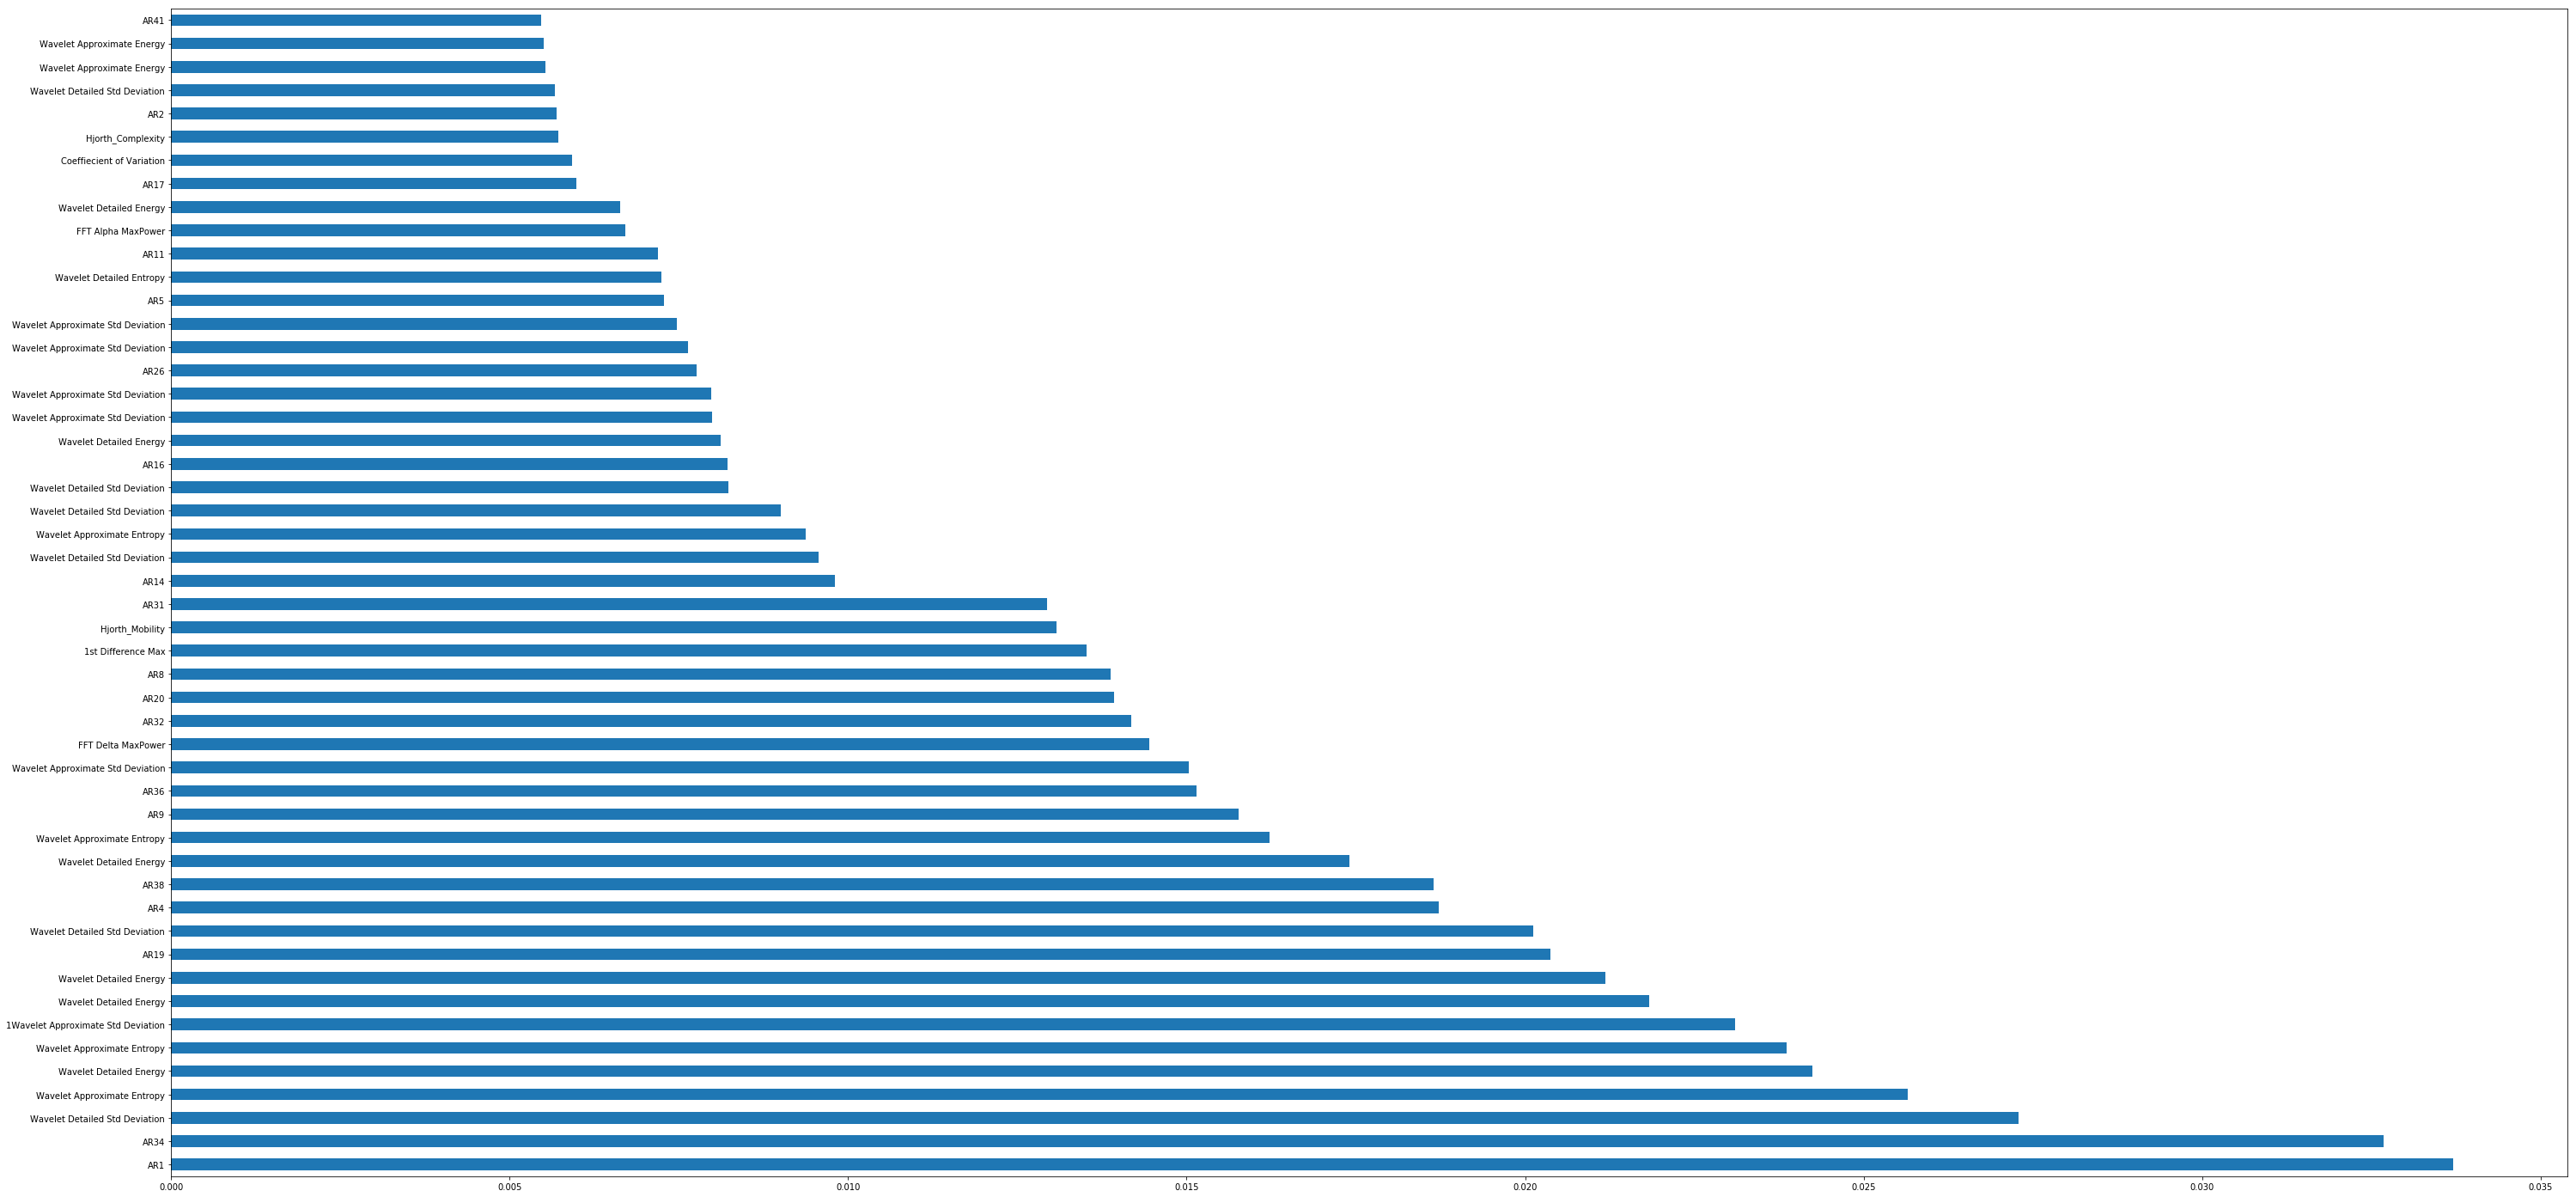

In [0]:
import pandas as pd
import numpy as np
import random


# data = pd.read_csv("D://Blogs//train.csv")
# X = data.iloc[:,0:20]  #independent columns
# y = data.iloc[:,-1]    #target column i.e price range
random.seed(5)   
from sklearn.ensemble import ExtraTreesClassifier
import matplotlib.pyplot as plt

model = ExtraTreesClassifier()
model.fit(X_train,y_train)

print(model.feature_importances_) #use inbuilt class feature_importances of tree based classifiers
y_test_pred = model.predict(X_test)
print (metrics.accuracy_score(y_test, y_test_pred, normalize=True, sample_weight=None))
#plot graph of feature importances for better visualization

feat_importances = pd.Series(model.feature_importances_, index=columns)
feat_importances.nlargest(50).plot(kind='barh')
plt.show()

In [0]:
feat_importances.sort_values(ascending =False).head(50)
# feat_importances1 = sorted(feat_importances, reverse = True)
# feat_importances1

AR1                                   0.033712
AR34                                  0.032683
Wavelet Detailed Std Deviation        0.027287
Wavelet Approximate Entropy           0.025648
Wavelet Detailed Energy               0.024246
Wavelet Approximate Entropy           0.023862
1Wavelet Approximate Std Deviation    0.023107
Wavelet Detailed Energy               0.021833
Wavelet Detailed Energy               0.021185
AR19                                  0.020372
Wavelet Detailed Std Deviation        0.020116
AR4                                   0.018721
AR38                                  0.018645
Wavelet Detailed Energy               0.017401
Wavelet Approximate Entropy           0.016224
AR9                                   0.015766
AR36                                  0.015148
Wavelet Approximate Std Deviation     0.015035
FFT Delta MaxPower                    0.014446
AR32                                  0.014187
AR20                                  0.013934
AR8          

In [0]:
print (X.shape)

(2568, 174)


In [0]:
len(columns)

174

In [0]:
data = pd.read_csv('/content/gdrive/My Drive/Features/Normalizedfeatures.csv', index_col = False)
print (data.head())
# len(data)
print (type(data))


   Coeffiecient of Variation  Mean of Vertex to Vertex Slope  \
0                  -1.125669                        0.022049   
1                  -1.100552                        0.036434   
2                  -1.049774                       -0.013238   
3                  -0.958845                       -0.027342   
4                  -0.916390                       -0.052836   

   Variance of Vertex to Vertex Slope  Hjorth_Activity  Hjorth_Mobility  \
0                           -0.776677        -0.923657        -0.627412   
1                           -0.776932        -0.903380        -0.651750   
2                           -0.776870        -0.852932        -0.665254   
3                           -0.776959        -0.815391        -0.902324   
4                           -0.775672        -0.821596        -0.892699   

   Hjorth_Complexity  Kurtosis  2nd Difference Mean  2nd Difference Max  \
0           0.085673  0.283751            -0.887253           -0.839178   
1           0.

In [0]:
data.head()

,Coeffiecient of Variation,Mean of Vertex to Vertex Slope,Variance of Vertex to Vertex Slope,Hjorth_Activity,Hjorth_Mobility,Hjorth_Complexity,Kurtosis,2nd Difference Mean,2nd Difference Max,Skewness,...,AR34,AR35,AR36,AR37,AR38,AR39,AR40,AR41,AR42,y
0,-1.125669,0.022049,-0.776677,-0.923657,-0.627412,0.085673,0.283751,-0.887253,-0.839178,0.214306,...,0.046138,0.172939,-0.234142,-0.118177,0.764333,-1.825703,-1.054078,1.799067,-0.218968,1
1,-1.100552,0.036434,-0.776932,-0.903380,-0.651750,0.266421,0.533136,-0.887701,-0.842542,0.612276,...,0.021503,-0.156163,0.103820,-0.084176,0.572223,-1.380737,-1.229272,1.543474,0.459338,1
2,-1.049774,-0.013238,-0.776870,-0.852932,-0.665254,0.452051,0.941036,-0.885473,-0.828246,-0.083744,...,-0.202683,-0.048021,0.385387,-0.480042,0.552907,-0.057010,-1.836184,1.609308,1.583392,1
3,-0.958845,-0.027342,-0.776959,-0.815391,-0.902324,0.781778,0.622623,-0.883749,-0.821521,-0.684864,...,-1.614062,0.638445,2.152921,-1.331875,0.613414,2.497135,-2.514157,1.944259,2.502220,1
4,-0.916390,-0.052836,-0.775672,-0.821596,-0.892699,0.739742,0.417912,-0.875548,-0.832451,0.018091,...,-1.434351,1.419284,1.146093,-1.963672,1.131366,3.027593,-2.356202,2.598594,1.344457,1


<class 'pandas.core.series.Series'>
y                                       1.000000
Wavelet Approximate Entropy.11          0.595006
Wavelet Approximate Entropy.5           0.595002
Wavelet Approximate Entropy.6           0.594922
Wavelet Approximate Entropy.3           0.594837
1Wavelet Approximate Entropy            0.594809
Hjorth_Activity                         0.594792
Wavelet Approximate Entropy.1           0.594705
Wavelet Approximate Entropy.2           0.594666
Wavelet Approximate Entropy.4           0.594509
Wavelet Approximate Entropy.12          0.594386
Wavelet Approximate Entropy.8           0.594166
Wavelet Approximate Entropy.7           0.594151
Wavelet Approximate Entropy.10          0.593408
Wavelet Approximate Entropy.9           0.593302
Variance of Vertex to Vertex Slope      0.589378
Wavelet Approximate Entropy             0.587520
Wavelet Detailed Energy.11              0.579441
Wavelet Detailed Energy.6               0.579348
Wavelet Detailed Energy.5        

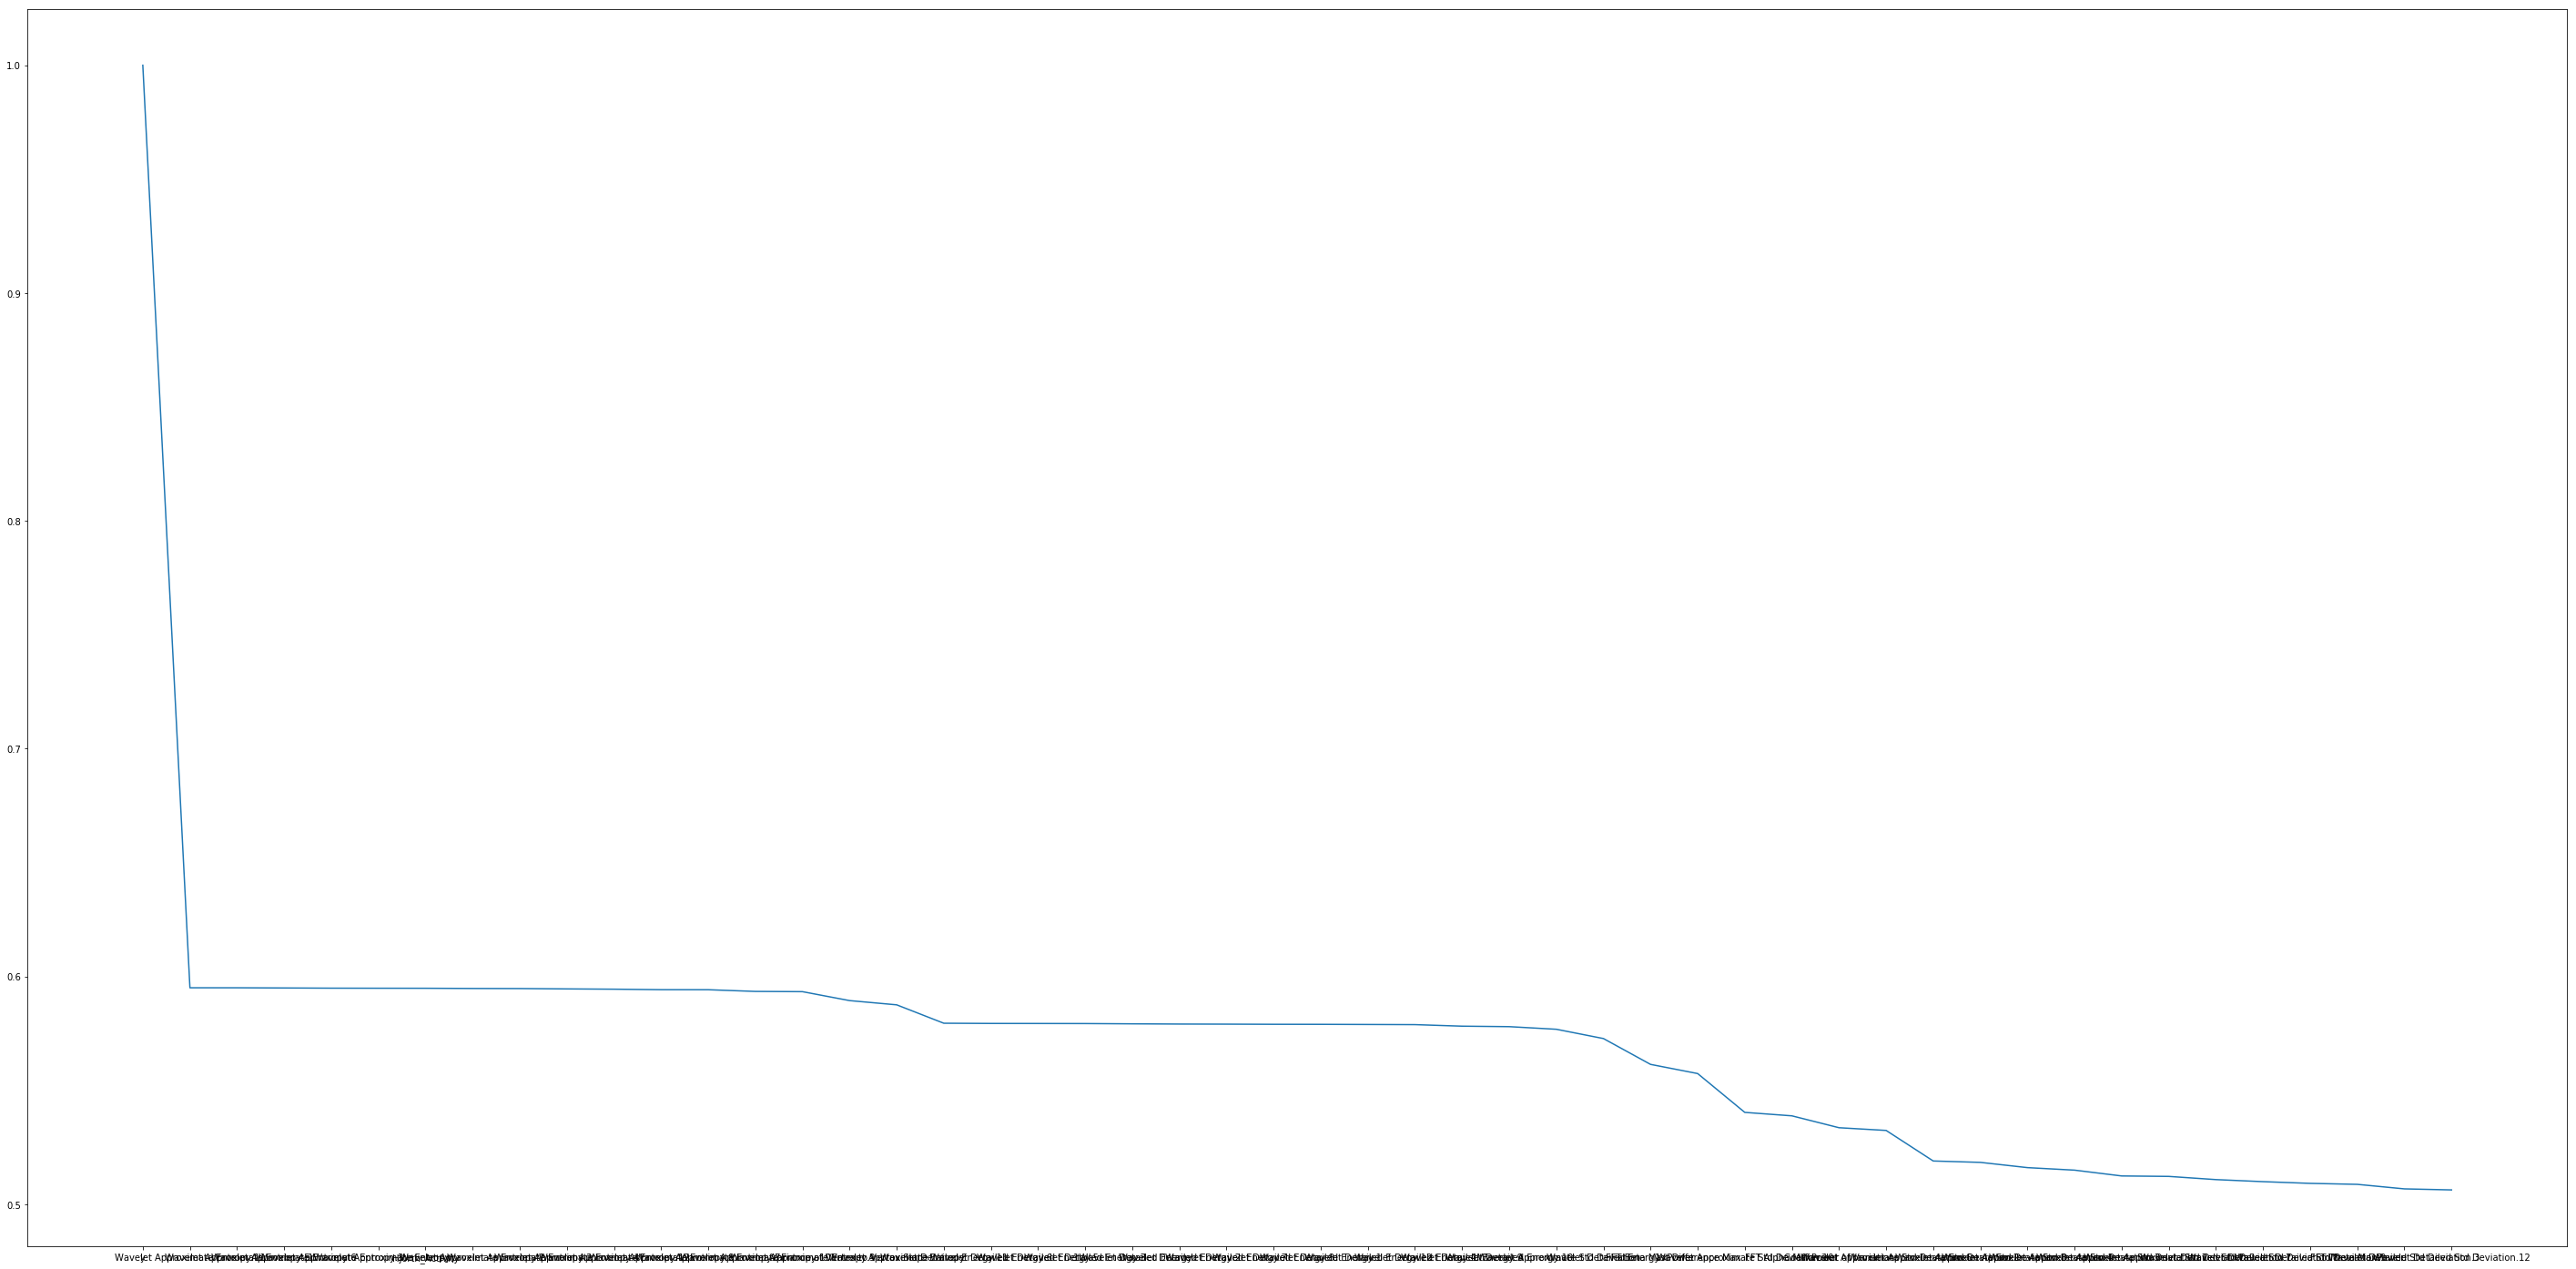

In [0]:
corrmat = data.corr()
top_corr_features = corrmat.index
# print ((corrmat.iloc[:,-1]))
y_corr = corrmat.iloc[:,-1]
print (type(y_corr))
y_corr1 = y_corr.abs().sort_values(ascending = False).head(50)
# y_corr.sort_values()

print (y_corr1)
plt.plot(y_corr1)

In [0]:
import pandas as pd
from sklearn.ensemble.forest import RandomForestClassifier
from sklearn.feature_selection import SelectFromModel

sel = SelectFromModel(RandomForestClassifier(n_estimators = 100))
sel.fit(X_train, y_train)



SelectFromModel(estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False),
        max_features=None, norm_order=1, prefit=False, threshold=None)

In [0]:
len(sel.get_support())

174

In [0]:
X_train1 = pd.DataFrame(X_train, columns = columns)
X_train1.head()

,Coeffiecient of Variation,Mean of Vertex to Vertex Slope,Variance of Vertex to Vertex Slope,Hjorth_Activity,Hjorth_Mobility,Hjorth_Complexity,Kurtosis,2nd Difference Mean,2nd Difference Max,Skewness,...,AR33,AR34,AR35,AR36,AR37,AR38,AR39,AR40,AR41,AR42
0,-0.693161,-0.068365,-0.771978,-0.707095,-0.975094,1.626437,-0.132000,-0.843914,-0.791670,-0.957866,...,0.707896,-0.877303,0.205388,1.297517,-1.183231,1.274003,0.116438,-1.005051,0.598647,1.230175
1,0.875386,-0.734078,0.608189,0.633262,1.079270,-1.006055,-1.077336,0.841293,0.891360,0.109937,...,0.102988,-0.705522,-0.303285,1.466003,1.008641,-1.335198,0.619162,0.970631,-1.377755,-0.157751
2,-0.787388,0.122321,-0.771022,-0.799116,-1.038804,1.138207,0.971666,-0.837658,-0.781997,3.314914,...,0.883476,1.797752,-1.211904,-1.947948,-0.040951,0.049045,-0.010808,0.320917,-0.583939,0.112850
3,-0.847055,0.021003,-0.758145,-0.765502,-0.694882,0.158399,1.525232,-0.797607,-0.914436,-1.301110,...,-0.209349,1.527740,-1.019338,-1.664935,-0.086110,0.114522,-0.054930,0.016201,0.148507,-0.223984
4,0.952005,0.683312,0.686915,0.741610,1.074591,-1.027110,-1.352338,0.972972,0.851376,-0.345139,...,-0.203517,-1.066111,0.684693,1.186010,0.741282,-0.893730,0.202901,0.695095,-0.748958,-0.419068


In [0]:
X_train1.columns

Index(['Coeffiecient of Variation', 'Mean of Vertex to Vertex Slope',
       'Variance of Vertex to Vertex Slope', 'Hjorth_Activity',
       'Hjorth_Mobility', 'Hjorth_Complexity', 'Kurtosis',
       '2nd Difference Mean', '2nd Difference Max', 'Skewness',
       ...
       'AR33', 'AR34', 'AR35', 'AR36', 'AR37', 'AR38', 'AR39', 'AR40', 'AR41',
       'AR42'],
      dtype='object', length=174)

In [0]:
selected_feat= X_train1.columns[(sel.get_support())]
print(len(selected_feat))
print(selected_feat[:11])

52
Index(['Variance of Vertex to Vertex Slope', '2nd Difference Mean',
       '1st Difference Mean', '1st Difference Max', 'FFT Delta MaxPower',
       'Delta/Theta', '1Wavelet Approximate Std Deviation',
       '1Wavelet Detailed Std Deviation', 'Wavelet Approximate Std Deviation',
       'Wavelet Detailed Std Deviation', 'Wavelet Approximate Std Deviation'],
      dtype='object')


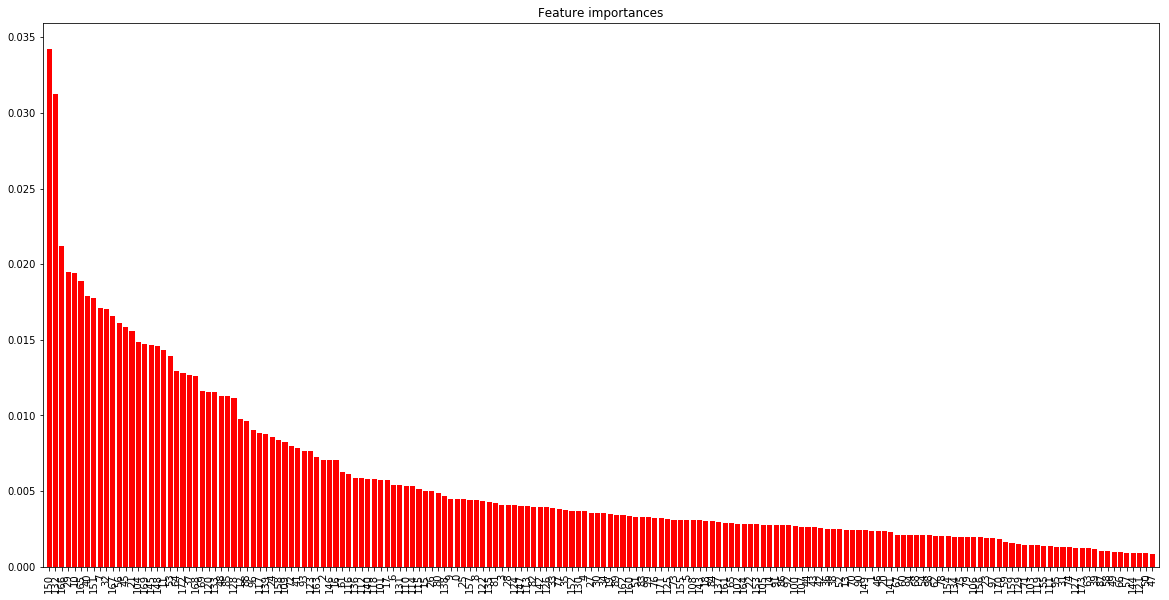

In [0]:
importances = sel.estimator_.feature_importances_
indices = np.argsort(importances)[::-1]
# X is the train data used to fit the model 
plt.figure(figsize=(20,10))
plt.title("Feature importances")
plt.bar(range(X.shape[1]), importances[indices],
       color="r", align="center")
plt.xticks(range(X.shape[1]), indices,rotation=90)
plt.xticks(rotation=90)
plt.xlim([-1, X.shape[1]])
plt.show()

In [0]:
print (importances[indices])

[0.03422753 0.03122519 0.02117382 0.01947081 0.01940008 0.01888975
 0.01789788 0.01773119 0.01710497 0.01706503 0.01654124 0.01610738
 0.01581663 0.01558489 0.01482277 0.01469968 0.01463232 0.01458716
 0.01431    0.01391402 0.01293907 0.01278374 0.012673   0.01258118
 0.0116149  0.01153822 0.01152355 0.01129242 0.01127963 0.01116138
 0.00977586 0.00963967 0.00904345 0.0088604  0.00877465 0.00855695
 0.00836135 0.00823358 0.00795708 0.00785653 0.00767952 0.00767713
 0.00727347 0.0070446  0.00703025 0.00702583 0.00626195 0.00613023
 0.00587803 0.00585563 0.00582018 0.00580874 0.00573462 0.00570878
 0.00542713 0.00540472 0.00531808 0.00530079 0.00515385 0.00500247
 0.00497174 0.00489599 0.00467031 0.00447999 0.00447269 0.00446388
 0.00443742 0.00438335 0.00433772 0.00424509 0.00424069 0.00410832
 0.00407879 0.00407487 0.00403786 0.00400367 0.00393092 0.00391941
 0.00391708 0.00389869 0.00381777 0.00374535 0.00371317 0.0037123
 0.00370887 0.00353295 0.00352303 0.00351578 0.00344967 0.00342

In [0]:
optimized_features = ['Kurtosis', 'Hjorth_Mobility','1Wavelet Detailed Std Deviation', 'Variance of Vertex to Vertex Slope',
                      '1Wavelet Approximate Std Deviation', 'Delta/Theta', 'Coeffiecient of Variation', 'Delta/Alpha',
                      'FFT Alpha MaxPower', '1st Difference Max', '1Wavelet Approximate Energy', '1Wavelet Detailed Energy',
                      'FFT Beta MaxPower', '1Wavelet Approximate Entropy']

In [0]:
X_train1 = pd.DataFrame(X_train, columns = columns)

In [0]:
X_train1

,Coeffiecient of Variation,Mean of Vertex to Vertex Slope,Variance of Vertex to Vertex Slope,Hjorth_Activity,Hjorth_Mobility,Hjorth_Complexity,Kurtosis,2nd Difference Mean,2nd Difference Max,Skewness,...,AR33,AR34,AR35,AR36,AR37,AR38,AR39,AR40,AR41,AR42
0,-0.693161,-0.068365,-0.771978,-0.707095,-0.975094,1.626437,-0.132000,-0.843914,-0.791670,-0.957866,...,0.707896,-0.877303,0.205388,1.297517,-1.183231,1.274003,0.116438,-1.005051,0.598647,1.230175
1,0.875386,-0.734078,0.608189,0.633262,1.079270,-1.006055,-1.077336,0.841293,0.891360,0.109937,...,0.102988,-0.705522,-0.303285,1.466003,1.008641,-1.335198,0.619162,0.970631,-1.377755,-0.157751
2,-0.787388,0.122321,-0.771022,-0.799116,-1.038804,1.138207,0.971666,-0.837658,-0.781997,3.314914,...,0.883476,1.797752,-1.211904,-1.947948,-0.040951,0.049045,-0.010808,0.320917,-0.583939,0.112850
3,-0.847055,0.021003,-0.758145,-0.765502,-0.694882,0.158399,1.525232,-0.797607,-0.914436,-1.301110,...,-0.209349,1.527740,-1.019338,-1.664935,-0.086110,0.114522,-0.054930,0.016201,0.148507,-0.223984
4,0.952005,0.683312,0.686915,0.741610,1.074591,-1.027110,-1.352338,0.972972,0.851376,-0.345139,...,-0.203517,-1.066111,0.684693,1.186010,0.741282,-0.893730,0.202901,0.695095,-0.748958,-0.419068
5,1.643822,-0.121969,1.900682,1.831463,1.243425,-1.076168,-0.216247,1.678519,2.050688,-0.065072,...,-1.463870,-0.597034,1.150148,-0.025389,1.056121,-0.717229,-1.313754,0.999852,-0.486121,-1.364316
6,0.837712,-0.064858,0.558379,0.582691,1.098848,-1.039778,-1.111514,0.943324,0.854235,-0.204159,...,-1.714397,-0.897575,1.986846,-0.271482,0.843804,-0.372416,-1.628736,0.792870,-0.013547,-1.561566
7,-0.689435,0.148286,-0.762261,-0.697064,-0.888818,0.896090,0.418233,-0.810443,-0.755090,-0.397973,...,2.073649,0.858823,-1.074963,-0.484193,-0.561401,0.034049,1.699539,-0.554526,0.058419,1.028906
8,-0.982409,-0.006011,-0.772640,-0.873830,-0.730794,0.391977,0.772697,-0.853605,-0.798815,-0.564144,...,0.427455,1.369047,-0.927652,-1.479255,-0.029407,0.009825,0.065293,-0.219531,0.060761,0.358623
9,-0.597483,0.149795,-0.765929,-0.571892,-0.939446,1.448394,-0.052374,-0.821232,-0.796713,0.371891,...,-0.030997,0.719020,-0.403395,-0.852568,-0.716014,0.870028,-0.215441,-0.625215,1.304570,-0.436015


In [0]:
X_train2 = X_train1[optimized_features]
# print (X_train1.columns)
X_train2.head()

,Kurtosis,Hjorth_Mobility,1Wavelet Detailed Std Deviation,Variance of Vertex to Vertex Slope,1Wavelet Approximate Std Deviation,Delta/Theta,Coeffiecient of Variation,Delta/Alpha,FFT Alpha MaxPower,1st Difference Max,1Wavelet Approximate Energy,1Wavelet Detailed Energy,FFT Beta MaxPower,1Wavelet Approximate Entropy
0,-0.132000,-0.975094,-0.835999,-0.771978,-0.729193,0.017465,-0.693161,0.235826,-0.721037,-0.842674,0.132308,-0.768000,-0.755593,-0.748110
1,-1.077336,1.079270,0.868634,0.608189,0.913950,-0.699487,0.875386,-0.712799,1.316568,0.706519,0.044559,0.579529,0.601332,0.504652
2,0.971666,-1.038804,-0.832686,-0.771022,-1.082856,1.203106,-0.787388,1.388798,-0.739327,-0.826893,0.094568,-0.767708,-0.763417,-0.748004
3,1.525232,-0.694882,-0.830701,-0.758145,-0.860311,-0.104903,-0.847055,0.385197,-0.706382,-0.762435,0.061594,-0.767527,-0.720595,-0.747902
4,-1.352338,1.074591,0.946718,0.686915,1.029657,-0.225135,0.952005,-0.659158,0.615795,0.784307,0.103290,0.694932,0.576008,0.627135


In [0]:
X_test1 = pd.DataFrame(X_test, columns = columns)

In [0]:
X_test2 = X_test1[optimized_features]
X_test2

,Kurtosis,Hjorth_Mobility,1Wavelet Detailed Std Deviation,Variance of Vertex to Vertex Slope,1Wavelet Approximate Std Deviation,Delta/Theta,Coeffiecient of Variation,Delta/Alpha,FFT Alpha MaxPower,1st Difference Max,1Wavelet Approximate Energy,1Wavelet Detailed Energy,FFT Beta MaxPower,1Wavelet Approximate Entropy
0,0.214134,-1.001184,-0.831399,-0.770594,-1.055412,2.038088,-0.723237,1.834969,-0.738361,-0.843681,0.085777,-0.767592,-0.764101,-0.747987
1,-1.226680,1.104229,0.909422,0.578182,0.776907,-0.735464,0.852961,-0.680692,0.109894,0.765674,0.145091,0.636094,0.608752,0.562422
2,0.470943,-0.750517,-0.848690,-0.768132,-0.543802,-0.504727,-0.970828,-0.401934,-0.693387,-0.825215,0.023115,-0.769035,-0.753226,-0.748528
3,0.340888,-1.024339,-0.829116,-0.766084,-0.478898,1.033827,-0.694051,0.436651,-0.681602,-0.760085,0.044472,-0.767383,-0.749688,-0.747787
4,-1.023095,1.142100,0.809409,0.480863,0.744541,-0.701924,0.731955,-0.732571,0.516273,0.608052,0.122969,0.490934,0.605053,0.414228
5,0.774734,-0.594272,-0.831811,-0.769450,-0.964983,-0.475773,-1.017355,-0.294796,-0.711605,-0.837638,0.051988,-0.767629,-0.746019,-0.747980
6,-0.047536,-1.105128,-0.830848,-0.757001,-0.259599,-0.234391,-0.512566,-0.101148,-0.434431,-0.721813,0.160209,-0.767542,-0.672036,-0.747869
7,-0.490701,1.416142,1.755865,2.302005,1.543212,-0.796651,1.633444,-0.755684,1.093313,1.975452,0.154000,2.217250,4.190418,2.321886
8,-1.184679,1.209239,0.910818,0.552060,0.806038,-0.750123,0.787108,-0.716665,0.090193,0.727469,0.020466,0.642312,0.611146,0.567303
9,-1.081742,1.347956,1.035161,0.897755,0.667342,-0.534297,0.859395,-0.668525,0.044892,0.674156,0.054420,0.839179,0.172093,0.779831


# **Classification With Optimized features**

In [0]:
#1-KNN
print('#1-KNN')
start=time.time()
model = neighbors.KNeighborsClassifier(n_neighbors = 20)
# model.fit(X_train, y_train)
model.fit(X_train2, y_train)
y_test_pred = model.predict(X_test2)
# y_pred = model.predict(X)
print (metrics.accuracy_score(y_test, y_test_pred, normalize=True, sample_weight=None))
end=time.time()
print("Time taken=",end-start)

#1-KNN
0.7507788161993769
Time taken= 0.044593095779418945


In [0]:
#2 - XGBoost Classifier
# use feature importance for feature selection
from numpy import loadtxt
from numpy import sort
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.feature_selection import SelectFromModel

start=time.time()

model = XGBClassifier(max_depth = 3, n_estimators = 5)
model.fit(X_train2, y_train)

# make predictions for test data and evaluate
y_pred = model.predict(X_test2)
predictions = [round(value) for value in y_pred]
accuracy = accuracy_score(y_test, predictions)
print("Accuracy: %.5f%%" % (accuracy * 100.0))
end=time.time()
print("Time taken=",end-start)
print (confusion_matrix(y_test, y_pred))

Accuracy: 83.33333%
Time taken= 0.04650688171386719
[[ 93   4   7]
 [  0 170  59]
 [  0  37 272]]


In [0]:
#3-SVM
print('#3-SVM')
def evaluate_on_test_data(model=None):
    predictions = model.predict(X_test2)
    correct_classifications = 0
    for i in range(len(y_test)):
        if predictions[i] == y_test[i]:
            correct_classifications += 1
    accuracy = 100*correct_classifications/len(y_test) #Accuracy as a percentage
    return accuracy

kernels = ('poly', 'rbf')
accuracies = []
for index, kernel in enumerate(kernels):
    start=time.time()
    model = svm.SVC(kernel=kernel, C = .1)
    model.fit(X_train2, y_train)
    acc = evaluate_on_test_data(model)
    accuracies.append(acc)
    end=time.time()
    print("Time taken=",end-start)
    print("Accuracy with {} kernel = {}".format(kernel,acc))

#3-SVM
Time taken= 0.10529685020446777
Accuracy with poly kernel = 66.51090342679127


/usr/local/lib/python3.6/dist-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


Time taken= 0.19813942909240723
Accuracy with rbf kernel = 70.5607476635514


In [0]:
#4-MLP
start=time.time()
model = MLPClassifier(hidden_layer_sizes=(3,3,3,5), random_state=1, alpha = .1)
# model.fit(X_train, y_train)
model.fit(X_train2, y_train)

y_test_pred = model.predict(X_test2)
print (metrics.accuracy_score(y_test, y_test_pred, normalize=True, sample_weight=None))
end=time.time()
print("Time taken=",end-start)
print (confusion_matrix(y_test, y_test_pred))

0.7180685358255452
Time taken= 1.3392183780670166
[[ 84   9  11]
 [  0 106 123]
 [  0  38 271]]


/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


In [0]:
#5-DecisionTree
print('#5-DecisionTree')
start=time.time()
model = tree.DecisionTreeClassifier(max_depth = 4)
# model.fit(X_train, y_train)
model.fit(X_train2, y_train)
y_test_pred = model.predict(X_test2)
metrics.accuracy_score(y_test, y_test_pred, normalize=True, sample_weight=None)
end=time.time()
print("Time taken=",end-start)

#5-DecisionTree
Time taken= 0.01843738555908203


In [0]:

#7-GaussianNB
print('#7-GaussianNB')
start=time.time()
model = GaussianNB()
model.fit(X_train2, y_train)
y_test_pred = model.predict(X_test2)
metrics.accuracy_score(y_test, y_test_pred, normalize=True, sample_weight=None)
end=time.time()
print("Time taken=",end-start)

#7-GaussianNB
Time taken= 0.007948875427246094


## PLotting Feature importance ****

### XGBoost

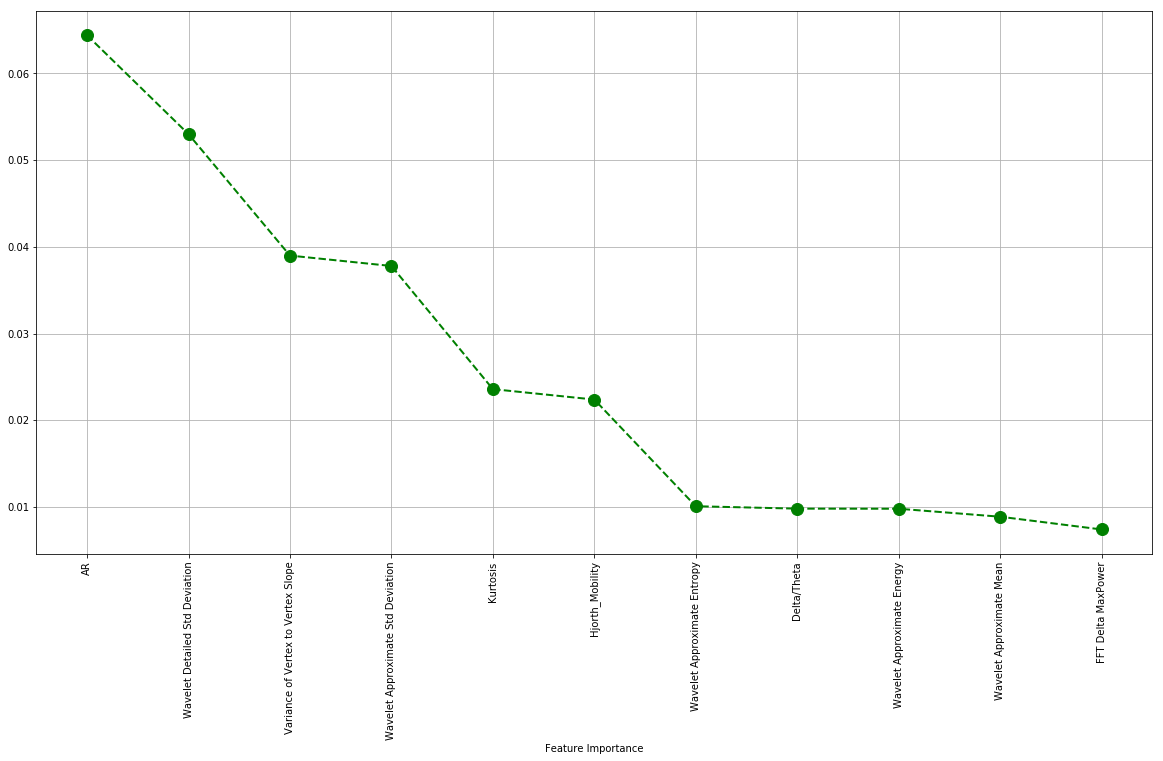

In [0]:
XGBoost_features = {'AR' : 0.0644,
                   'Wavelet Detailed Std Deviation' : [0.053],
                   'Variance of Vertex to Vertex Slope' : [0.039],
                   'Wavelet Approximate Std Deviation' : [0.0378],
                   'Kurtosis' : [0.0236],
                   'Hjorth_Mobility' : [0.0224],
                   'Wavelet Approximate Entropy' : [0.0101],
                   'Delta/Theta' : [0.00982],
                   'Wavelet Approximate Energy' : [0.009809],
                   'Wavelet Approximate Mean' : [0.00889],
                   'FFT Delta MaxPower' : [0.00742]}

XGBoost_df = pd.DataFrame(XGBoost_features)
# XGBoost_df

plt.rcParams['figure.figsize'] = [20, 10]
plt.plot(XGBoost_df.columns,XGBoost_df.iloc[0], color='green', marker='o', linestyle='dashed', linewidth=2, markersize=12)
plt.xticks(XGBoost_df.columns, rotation='vertical')
plt.xlabel('Feature Importance')
plt.grid(b=None, which='major', axis='both')
plt.show()

### Extra TRees Classifier

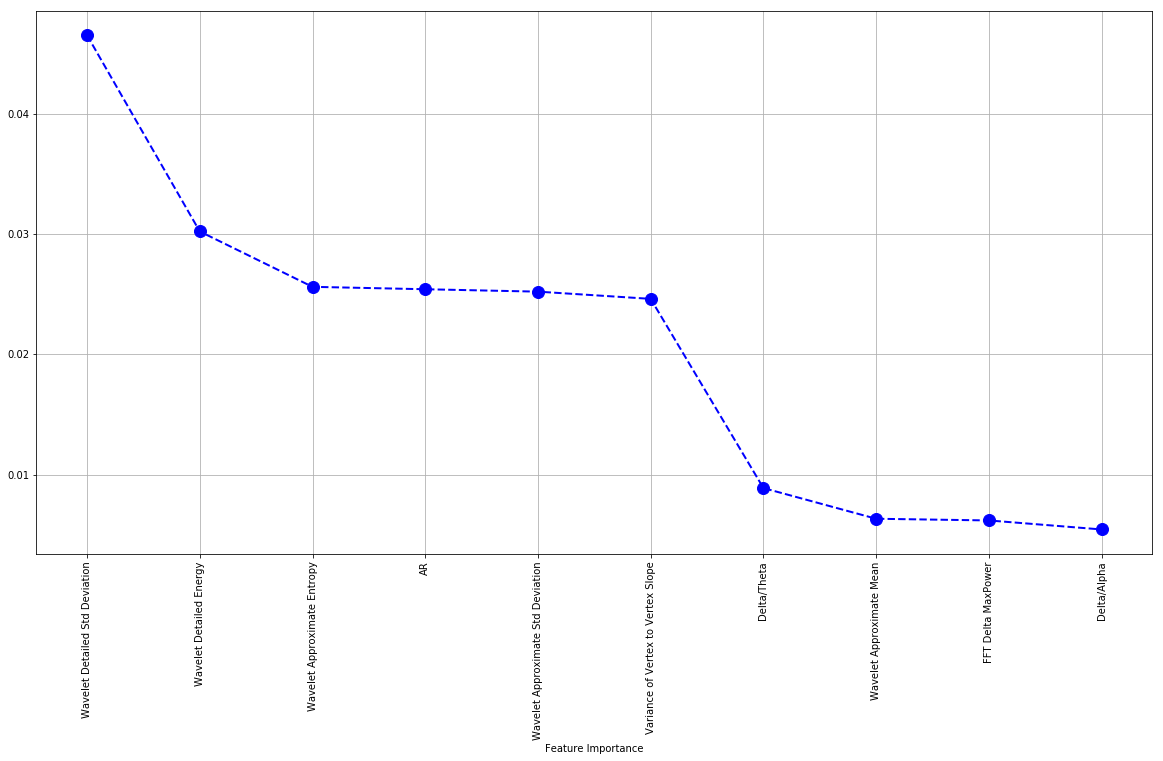

In [0]:
ETrees_features = {'Wavelet Detailed Std Deviation' : [0.0465],               
                   'Wavelet Detailed Energy' : [0.0302],
                   'Wavelet Approximate Entropy' : [0.0256],                  
                   'AR' : [0.0254],
                   'Wavelet Approximate Std Deviation' : [0.0252],
                   'Variance of Vertex to Vertex Slope' : [0.0246],
                   'Delta/Theta' : [0.00888],
                   'Wavelet Approximate Mean' : [0.00633],
                   'FFT Delta MaxPower' : [0.00619],
                   'Delta/Alpha' : [0.00544]}

ETrees_df = pd.DataFrame(ETrees_features)
# ETrees_df

plt.rcParams['figure.figsize'] = [20, 10]
plt.plot(ETrees_df.columns,ETrees_df.iloc[0], color='blue', marker='o', linestyle='dashed', linewidth=2, markersize=12)
plt.xticks(ETrees_df.columns, rotation='vertical')
plt.xlabel('Feature Importance')
plt.grid(b=None, which='major', axis='both')
plt.show()

### Correlation 

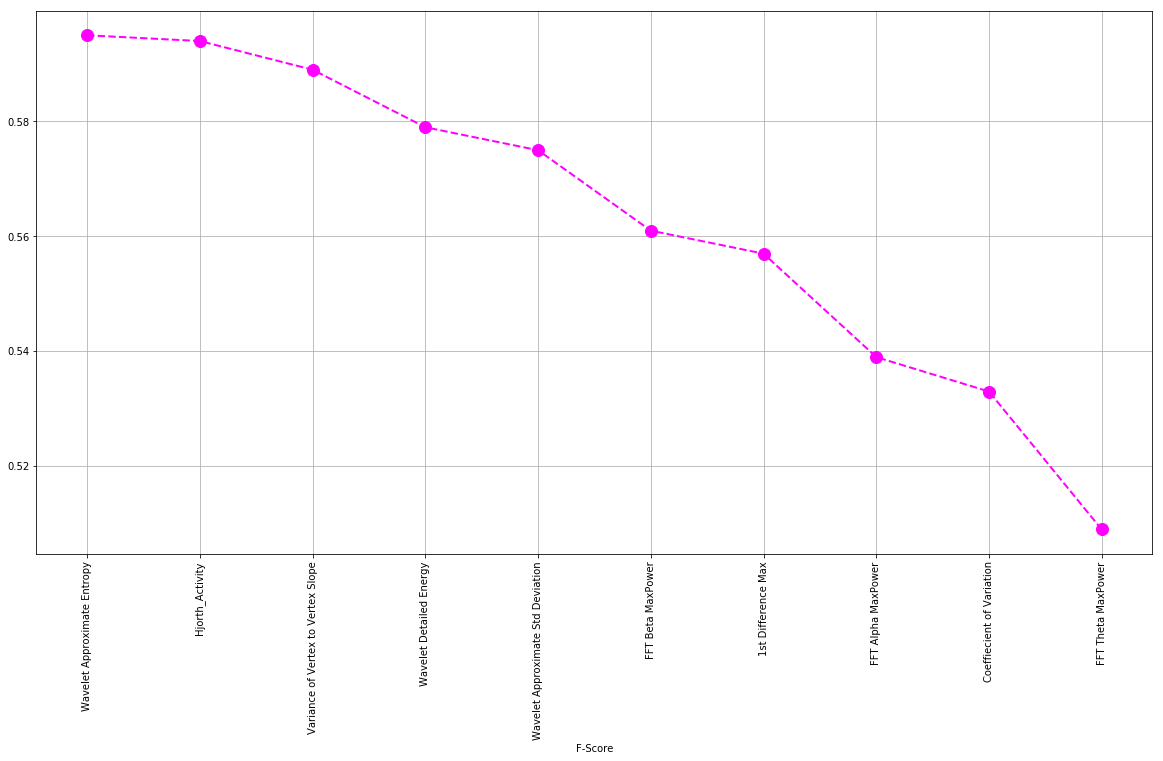

In [0]:
Corr_features =   {'Wavelet Approximate Entropy' : [0.595],
                   'Hjorth_Activity' : [0.594],
                   'Variance of Vertex to Vertex Slope' : [0.589],
                   'Wavelet Detailed Energy' : [0.579],
                   'Wavelet Approximate Std Deviation' : [0.575],
                   'FFT Beta MaxPower' : [0.561],
                   '1st Difference Max' : [0.557],
                   'FFT Alpha MaxPower' : [0.539],
                   'Coeffiecient of Variation' : [0.533],
                   'FFT Theta MaxPower' : [0.509]
                  }

Corr_df = pd.DataFrame(Corr_features)
# Corr_df

plt.rcParams['figure.figsize'] = [20, 10]
plt.plot(Corr_df.columns,Corr_df.iloc[0], color='magenta', marker='o', linestyle='dashed', linewidth=2, markersize=12)
plt.xticks(Corr_df.columns, rotation='vertical')
plt.grid(b=None, which='major', axis='both')
plt.xlabel('F-Score')
plt.show()


In [0]:
Corr_df.columns

Index(['Wavelet Approximate Entropy', 'Hjorth_Activity',
       'Variance of Vertex to Vertex Slope', 'Wavelet Detailed Energy',
       'Wavelet Approximate Std Deviation', 'FFT Beta MaxPower',
       '1st Difference Max', 'FFT Alpha MaxPower', 'Coeffiecient of Variation',
       'FFT Theta MaxPower'],
      dtype='object')